The freqeuncy modulation signals are expressed as  
    $ \delta \nu_{2,3} = \pm \nu_x {\rm sin} (\Omega t)  + \nu_x {\rm cos}(\Omega t)$  
For convenience, we transform them to  
    $\delta \nu_2 = \sqrt{\nu_x^2 + \nu_y^2} {\rm sin}(\Omega t + \alpha)$  
    $\delta \nu_3 = \sqrt{\nu_x^2 + \nu_y^2} {\rm sin}(\Omega t + \pi - \alpha)$  
where $ {\rm sin}(\alpha) = \nu_y / \sqrt{\nu_x^2 + \nu_y^2}$

### Circular modulation
$\nu_x / \nu_y = 1/\sqrt{3} \leftrightarrow \alpha = \pi /3$  
$\delta \nu_2 = 2 \nu_x {\rm sin}(\Omega t + \pi /3)$  
$\delta \nu_3 = 2 \nu_x {\rm sin}(\Omega t + 2 \pi /3)$  

1. Phase difference between $\delta \nu_2$ and $\delta \nu_3$ fixs proportion of forcing amplitudes $K, K'$.
2. On the other hand, the final phase determines micromotion.
    Lattice shaking ramp up time : $t_r$  
    Lattice shaking hold time : $t_h$  
    Trigger delay time : $t_{trigger}$
    Burst delay time : $t_{burst}$
    Total modulation time $t_{total} = t_r + t_h + t_{trigger} - t_{burst}$

For practial use, the frequency modulation signals can be written as  
$\delta \nu_2 = 2 \nu_x {\rm sin}(\Omega t_{total} + \phi_m)$  
$\delta \nu_3 = 2 \nu_x {\rm sin}(\Omega t_{total} + \pi /3 + \phi_m)$  


## Load modules

In [2]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
#from scipy.ndimage import gaussian_filter1d
import sys
import matplotlib.animation as animation

## Parameters

In [3]:
date = '20211130'
dataNo = 4
scanNo = 4

## Data Preparation

In [4]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [5]:
scan_param = scan_data['A0139: LS Phase 1']

In [6]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

## Calculate Center of Mass

In [7]:
CoMx_list=[]
CoMy_list=[]
for N in range(len(trans_files)):
    CoMy = []
    CoMx = []
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx_list.append(np.sum(CoMx))
    CoMy_list.append(np.sum(CoMy))

## Average Data

In [8]:
unique_param = scan_param.unique()
centerx_list = []
centery_list = []
centerx_err_list = []
centery_err_list = []

for i in range(len(unique_param)):
    # print(unique_param[i])
    centerx_temp = []
    centery_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            # print(np.sum(img_trans_list[j][y0:y1,x0:x1])/np.sum(img_trans_list[j]))
            centerx_temp.append(CoMx_list[j])
            centery_temp.append(CoMy_list[j])
    centerx_list.append(np.mean(centerx_temp))
    centery_list.append(np.mean(centery_temp))
    centerx_err_list.append(np.std(centerx_temp))
    centery_err_list.append(np.std(centery_temp))


## Plot Figures

(-12.0, 12.0)

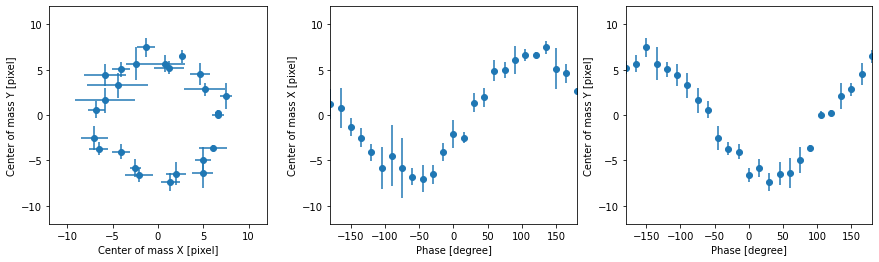

In [22]:
y_mean = np.mean(CoMy_list)
x_mean = np.mean(CoMx_list)
fig =plt.figure(figsize=[15,4])
fig.tight_layout()
ax1 = fig.add_subplot(1,3,1)
# ax1.scatter(CoMx_list-x_mean,CoMy_list-y_mean)
ax1.errorbar(centerx_list-x_mean, centery_list-y_mean,xerr=centerx_err_list,yerr=centery_err_list,fmt='o')
ax1.set_xlabel("Center of mass X [pixel]")
ax1.set_ylabel("Center of mass Y [pixel]")
ax1.set_xlim(-12,12)
ax1.set_ylim(-12,12)
ax1.set_aspect('equal')

ax2 = fig.add_subplot(1,3,2)
# ax2.scatter(scan_param,CoMx_list-x_mean)
ax2.errorbar(unique_param,centerx_list-x_mean, yerr=centerx_err_list, fmt='o')
ax2.set_xlabel("Phase [degree]")
ax2.set_ylabel("Center of mass X [pixel]")
ax2.set_xlim(-180,180)
ax2.set_ylim(-12,12)
# ax2.set_aspect('equal')

ax3 = fig.add_subplot(1,3,3)
# ax3.scatter(scan_param,CoMy_list-y_mean)
ax3.errorbar(unique_param,centery_list-y_mean, yerr=centery_err_list, fmt='o')
ax3.set_xlabel("Phase [degree]")
ax3.set_ylabel("Center of mass Y [pixel]")
ax3.set_xlim(-180,180)
ax3.set_ylim(-12,12)
# ax3.set_aspect('equal')